In [1]:
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

from math import *

In [121]:
N_grid=10000
L=20

W=np.pi
dw=0.1

In [122]:
t=np.linspace(0, L, N_grid)
h=t[2]-t[1]

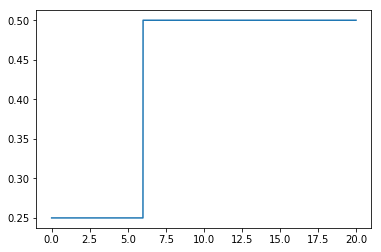

In [190]:
k0=np.array([0.25]*N_grid)
k0[3000:10000]=0.5

plt.figure()
plt.plot(t, k0)
plt.show()

In [191]:
k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")

In [192]:
def deriv_z(z, t2, dw, k0_f):
    return 2*dw-sin(z)*k0_f(t2)

In [193]:
init=np.arcsin(2*dw/k0[0])

theta = integrate.odeint(deriv_z, init, t, (dw, k0_f,))
theta=theta.ravel()

In [194]:
x0=np.sin(W*t)
y0=np.sin(W*t+theta)

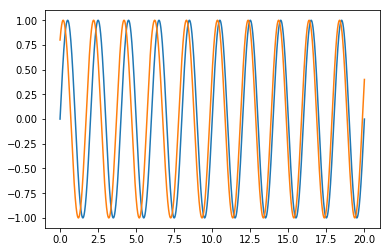

In [195]:
plt.figure()
plt.plot(t, x0)
plt.plot(t, y0)
plt.show()

In [196]:
T=2*np.pi/W
th=int(round(T/(2*h)))

C0=[0]*N_grid
xc=np.append(x0, np.append(x0, x0))
yc=np.append(y0, np.append(y0, y0))
for i in range(N_grid):
    a1=xс[i-th+N_grid:i+th+N_grid]
    a2=yс[i-th+N_grid:i+th+N_grid]
    C0[i]=np.corrcoef(a1, a2)[0][1]
    
phi0=np.arccos(C0)

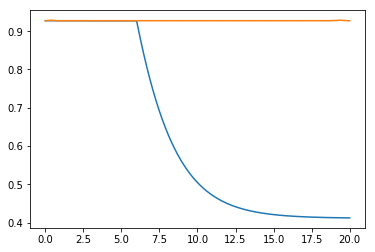

In [197]:
plt.figure()
plt.plot(t, theta)
plt.plot(t, phi0)
plt.show()

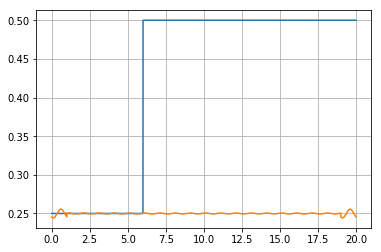

In [198]:
dphi_hat=np.diff(phi0)/h
dphi_hat=np.append(dphi_hat[1], dphi_hat)
k_hat=np.divide(np.array([2*dw]*N_grid)-dphi_hat, np.sin(phi0))

for i in range(N_grid):
    if (abs(k_hat[i])>1):
        k_hat[i]=nan
        
plt.figure()
plt.grid(True)
plt.plot(t, k0)
plt.plot(t, k_hat)
plt.show()